# Cluster Algorithm

## 1 Instruction

$x_i$ is point i 

X presents the set of all points

$N=|X|$

$c_i$ is cluster i

C presents the set of all clusters

$K=|C|$

## 2 Prepare Data

In [3]:
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
#noisy_circles
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
#noisy_moons
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
#blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
#no_structure
no_structure = np.random.rand(n_samples, 2), None
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

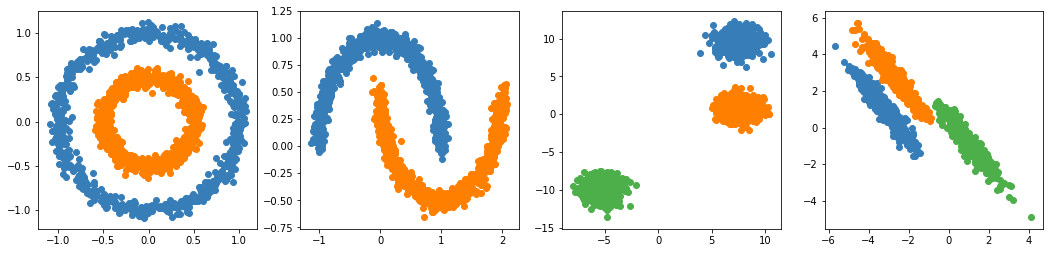

In [4]:
#Show the plot of data set
color_list=['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
plt.figure(figsize=(18,4))

plt.subplot(141)
noisy_circles_data=noisy_circles[0]
noisy_circles_cluster=noisy_circles[1]
cluster_type=set(noisy_circles_cluster)
for i,j in enumerate(cluster_type):
    plt.scatter(noisy_circles_data[noisy_circles_cluster==j,0],noisy_circles_data[noisy_circles_cluster==j,1],c=color_list[i])

plt.subplot(142)
noisy_moons_data=noisy_moons[0]
noisy_moons_cluster=noisy_moons[1]
cluster_type=set(noisy_moons_cluster)
for i,j in enumerate(cluster_type):
    plt.scatter(noisy_moons_data[noisy_moons_cluster==j,0],noisy_moons_data[noisy_moons_cluster==j,1],c=color_list[i])

plt.subplot(143)
blobs_data=blobs[0]
blobs_cluster=blobs[1]
cluster_type=set(blobs_cluster)
for i,j in enumerate(cluster_type):
    plt.scatter(blobs_data[blobs_cluster==j,0],blobs_data[blobs_cluster==j,1],c=color_list[i])

plt.subplot(144)
aniso_data=aniso[0]
aniso_cluster=aniso[1]
cluster_type=set(aniso_cluster)
for i,j in enumerate(cluster_type):
    plt.scatter(aniso_data[aniso_cluster==j,0],aniso_data[aniso_cluster==j,1],c=color_list[i])

In [58]:
#Functions for showing result
def show_result(cluster,data):
    x_cluster=cluster.fit(data)
    cluster_type=set(x_cluster)
    initial_x=kmeans.initial_x
    for i,j in enumerate(cluster_type):
        plt.scatter(data[x_cluster==j,0],data[x_cluster==j,1],c=color_list[i])
    plt.scatter(initial_x[:,0],initial_x[:,1],c='#e41a1c')
    
def displot_imgs(cluster,data_set,test_count=3):
    for data in data_set:
        plt.figure(figsize=(18,5))
        for i in range(1,test_count+1):
            plt.subplot(1,test_count,i)
            show_result(cluster,data)

## 3 KMeans

### 3.1 Llyod Algorithm

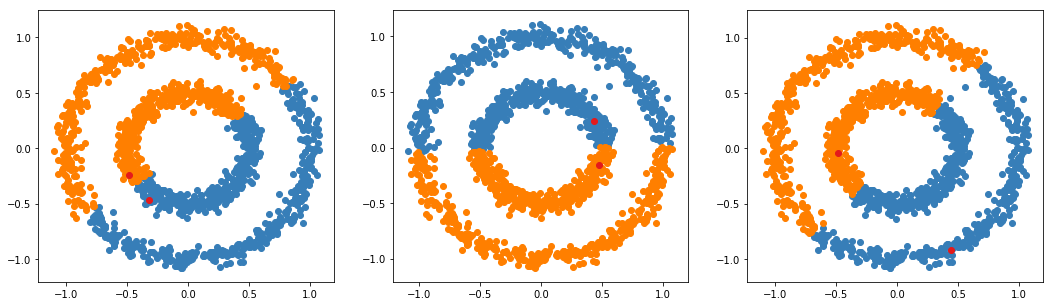

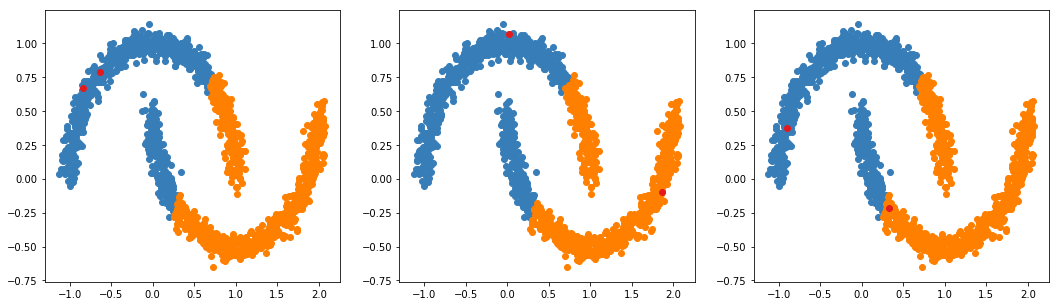

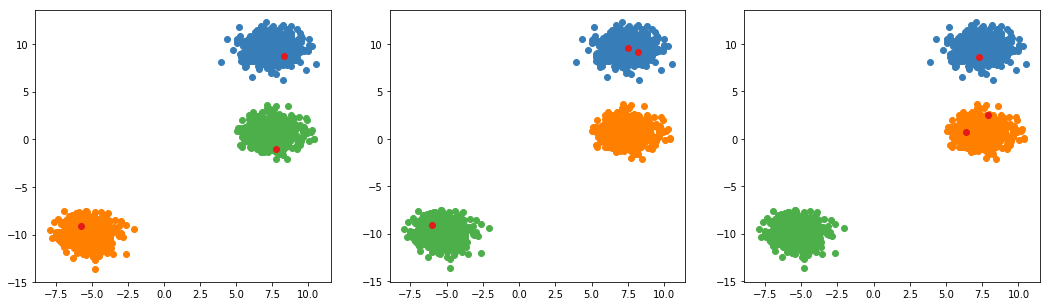

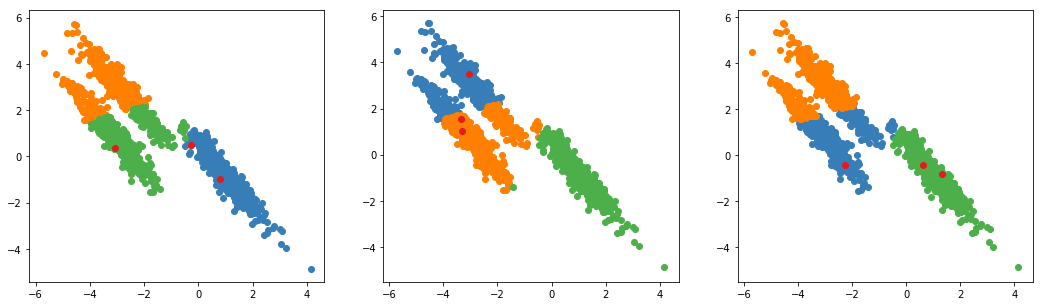

In [76]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',1000)
class KMeans:
    def __init__(self,clusters_num,max_iterations=200,lamb=0.9,max_diff=0.00001):
        self.clusters_num=clusters_num
        self.max_iterations=max_iterations
        self.lamb=lamb
        self.max_diff=max_diff
        self.centroids=[]
        self.x_clusters=[]
        self.initial_x=None
        
    def fit(self,x_data):
            #Get parameters
            x_data=np.array(x_data)
            clusters_num=self.clusters_num
            max_iterations=self.max_iterations
            lamb=self.lamb
            max_diff=self.max_diff            
            #Initialization
            centroids=self.pick_initial(x_data,clusters_num)
            x_cluster=np.array([-1]*len(x_data))
            #Main Loop
            for intera in range(max_iterations):
                #Chose cluster for point x
                for i,x in enumerate(x_data):
                    shortest_dis=np.inf
                    for j,c in enumerate(centroids):
                        dis=self.eu_dis(x,c)
                        if dis<shortest_dis:
                            shortest_dis=dis
                            x_cluster[i]=j
                #Update centroid
                accumulate_diff=0
                for i in range(clusters_num):
                    x_in_cluster=x_data[x_cluster==i]
                    centroids_old=centroids[i].copy()
                    centroids[i]=centroids_old*(1-lamb)+np.mean(x_in_cluster,axis=0)*lamb
                    accumulate_diff+=self.eu_dis(centroids[i],centroids_old)
                #If stop                
                if accumulate_diff<=max_diff:
                    break
            
            self.centroids=centroids
            self.x_cluster=x_cluster
            return x_cluster
            
    def pick_initial(self,x,k):
        x=list(x.copy())
        initial_x=[]
        x_count=len(x)
        for _ in range(k):
            random_i=random.randint(0,x_count-1)
            initial_x.append(x.pop(random_i))
        self.initial_x=np.array(initial_x)
        return np.array(initial_x)
    
    def eu_dis(self,x,y):
        dis=0
        for xi,yi in zip(x,y):
            dis+=(xi-yi)**2
        return np.sqrt(dis)
    
if __name__=='__main__':
    kmeans=KMeans(2,lamb=0.1)
    data_set=[noisy_circles_data,noisy_moons_data]
    displot_imgs(kmeans,data_set)
    kmeans=KMeans(3,lamb=0.1)
    data_set=[blobs_data,aniso_data]
    displot_imgs(kmeans,data_set)
              



   

## KMean++

The result above shows that the initial centroids is very import to the reuslt. To avoid the disadvantage of kmeans, we try to chose inital centroids which are far away from each other.
The red point in images above ara intial points chosen randomly

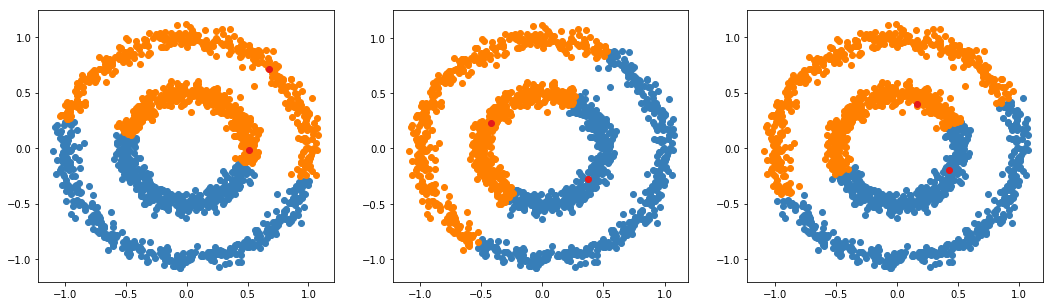

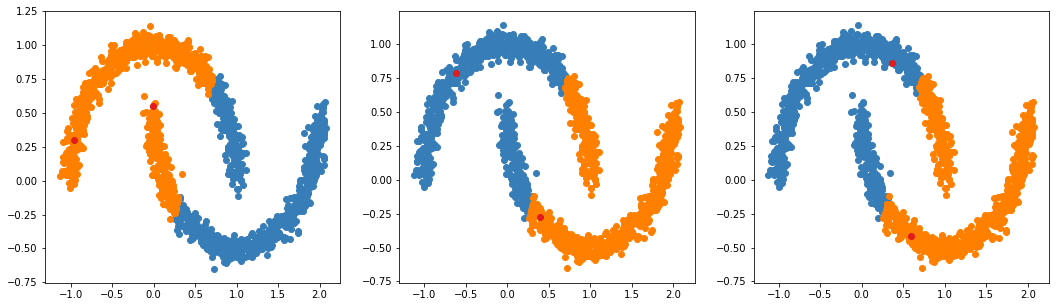

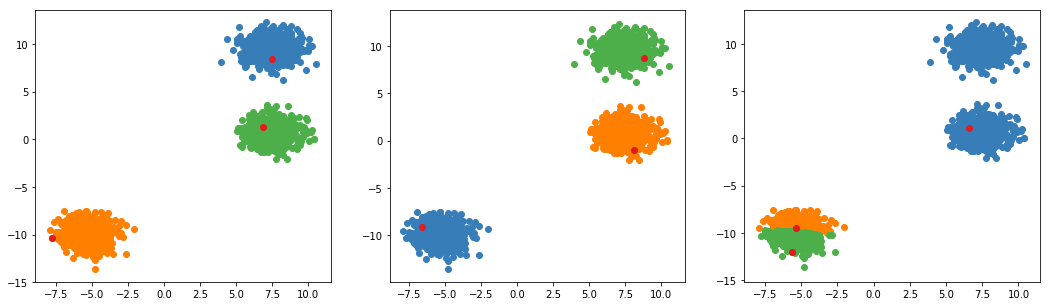

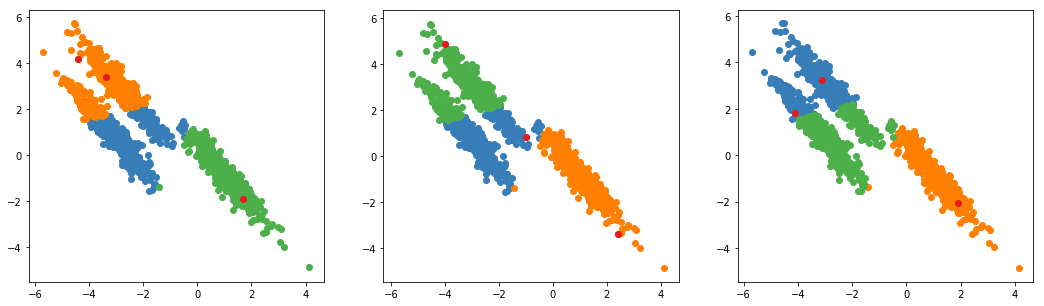

In [77]:
class KMeans_plus(KMeans):
    def pick_initial(self,x,k):
        x=list(x.copy())
        x_count=len(x)
        initial_x=[]
        initial_x.append(x.pop(random.randint(0,x_count)))
        for i in range(k-1):
            shortest_dis_list=[]
            for j in range(len(x)):
                shortest_dis=np.inf
                for c in initial_x:
                    dis=self.eu_dis(x[j],c)
                    if dis<shortest_dis:
                        shortest_dis=dis
                shortest_dis_list.append(shortest_dis)
            initial_x.append(x.pop(self.chose_p_value(shortest_dis_list)))                
        self.initial_x=np.array(initial_x)
        return np.array(initial_x)
        
    def chose_p_value(self,p_distribute):
        p_distribute=np.array(p_distribute)
        p_sum=np.sum(p_distribute)
        p_distribute=p_distribute/(p_sum+0.0)        
        p_cum_distribute=np.cumsum(p_distribute)
        chosen_id=None
        r=random.random()
        for i,cum_p in enumerate(p_cum_distribute):
            if r<=cum_p:
                chosen_id=i
                break
        return chosen_id
        
if __name__=='__main__':
    kmeans=KMeans_plus(2,lamb=0.1)
    data_set=[noisy_circles_data,noisy_moons_data]
    displot_imgs(kmeans,data_set)
    
    kmeans=KMeans_plus(3,lamb=0.1)    
    data_set=[blobs_data,aniso_data]
    displot_imgs(kmeans,data_set)

               